# Exercise 1

The Pott's model is a generalization of the Ising model which was originally intended for models of two states of spin in a given lattice of "d" dimension. The Ising model was first used to study the theory of ferromagnetism. The Pott's model like the Ising model is used to find critical points in a system making the two-dimensional Pott's model more appealing because you can find the critical points mathematically. 

However, once you go into 3-4 dimensions you can only solve these numerically and with computers. The most relevant equations I have found for this model are as follows:

$\Theta_n=(2*\pi*n)/q$ ; The Hamiltonian interaction between neighbors $H=-J(\theta_{ij})$ where $\theta_{ij}$ is the angle between two neighboring vectors written as $J(\theta{ij})=-\epsilon_1cos\theta$

This leads us to finding the critical point for all q written as $J(\theta{ij})=-\epsilon_2\delta_{K,r}(n_i,n_j)$

# Exercise 2

Average number of tries: 3.2051282051282053


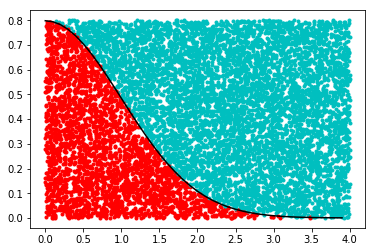

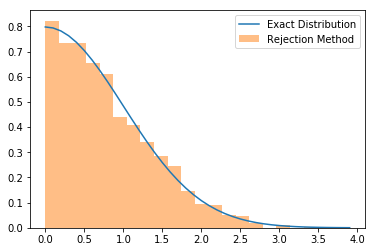

In [2]:
#Lab 9
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

#Inefficient Method
n = 10000
success = 0
x = np.arange(0,4,0.1)
naiveRejection = []
        
def probDense(x):
    return (2*np.exp(-x**2/2))/(np.sqrt(2*np.pi))

for i in range(n):
    xValue = 4*np.random.rand()
    yValue = 0.8*np.random.rand()
    
    if yValue < probDense(xValue):
        plt.plot(xValue,yValue,'r.')
        success += 1
        naiveRejection.append(xValue)
    else:
        plt.plot(xValue,yValue,'c.')

print("Average number of tries:", n/success)
plt.plot(x,probDense(x), color='black')
plt.show()

plt.plot(x,probDense(x), label='Exact Distribution')
plt.hist(naiveRejection, bins = 20, density = True,\
         alpha = 0.5, label = 'Rejection Method')
plt.legend()
plt.show()

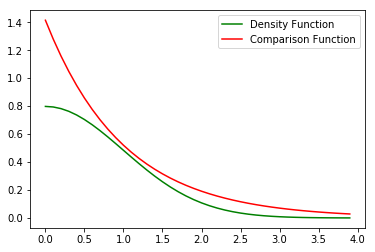

In [3]:
#Plotting f(x) and probability function together

cutoff = 4

def f(x):
    return np.sqrt(2)*np.exp(-x)

#Integral Function
def int_fn(x):
    return -(np.sqrt(2)*np.exp(-x))+np.sqrt(2)

plt.plot(x,probDense(x), color='green', label='Density Function')
plt.plot(x,f(x), color='red', label='Comparison Function')
plt.legend()
plt.show()

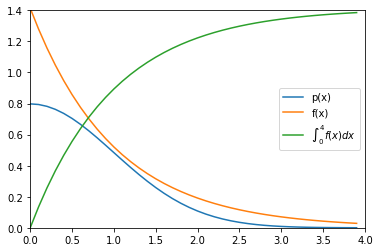

In [4]:
#Plot of all three functions
plt.plot(x, probDense(x), label="p(x)")
plt.plot(x, f(x), label="f(x)")
plt.plot(x, int_fn(x), label=r"$\int_0^{4} f(x)dx$")
plt.xlim(0,4)
plt.ylim(0,1.4)
plt.legend()
plt.show()

Average number of trials:  1.4376
Success rate:  0.6956037840845855


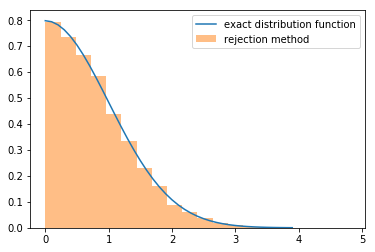

In [5]:
#Plotting under f(x) instead
# implementation of the general rejection method
# for the exponential distribution and linear comparison function

counter = 0

def exp_rejection():
    global counter
    # repeat until acceptance
    accept = False
    x0 = 0
    while(accept == False):
        counter += 1
        
        # pick a random point between 0 and the full integral of f(x) at infinity
        I = np.sqrt(2)*np.random.rand()

        #Solving the integral function for x using wolfram
        x0 = np.log(np.sqrt(2)/(np.sqrt(2)-I))
        
        # pick a random value between 0 and int_f(x0)
        y0 = f(x0)*np.random.rand()

        # accept or reject
        if y0 < probDense(x0):
            accept = True
    return x0

rejection_data = []
for i in range(n):
    rejection_data = np.append(rejection_data, exp_rejection())

print("Average number of trials: ", counter/n)
print("Success rate: ", n/counter)
    
# compare results
plt.plot(x, probDense(x), label = 'exact distribution function')
plt.hist(rejection_data, bins = 20, density = True,\
        alpha = 0.5, label = 'rejection method')
plt.legend()
plt.show()

# Exercise 3

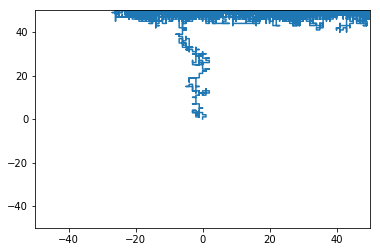

In [8]:
#Steps and lattice size
import matplotlib.animation as animation

nsteps=10000
lattice = int((101-1)/2)

xWalk = []
yWalk = []
walkerx = 0
walkery = 0

for k in range(nsteps):
    xWalk.append(walkerx)
    yWalk.append(walkery)
    sample = np.random.rand()
    if sample < 0.4 and walkery<lattice:
        walkery += 1
    elif sample < 0.6 and walkery>-lattice:
        walkery -= 1
    elif sample < 0.8 and walkerx<lattice:
        walkerx += 1
    elif walkerx>-lattice:
        walkerx -= 1

plt.plot(xWalk,yWalk)   
plt.xlim(-lattice,lattice)
plt.ylim(-lattice,lattice)
plt.show()

# ############################# Extra Credit #############################
    
# def animate(i):
      
#     if i > 0:
#         plt.cla()
#         plt.xlim(-5,101)
#         plt.ylim(-5,101)
#         plt.scatter(xWalk[0:i+1],yWalk[0:i+1])
#         #plt.plot(xWalk[i],yWalk[i])
#         plt.xlabel('x')
#         plt.ylabel('y')
#         plt.title('time = %d' %i)

# simulation = animation.FuncAnimation(fig, animate, frames = 40, repeat = False)

# from IPython.display import HTML
# HTML(simulation.to_jshtml())